# Cancer Classifier
This project aims to develop a K Nearest Neighbors model to predict if an individual has breast cancer or not. This project employs the 
dataset of: [Diagnostics of Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).


## Import Python Modules

To start, import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer # Load information
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data
The initial step involves saving the dataset into `breast_cancer_data` in order to have a sense about what the data looks like.

In [2]:
data = load_breast_cancer().data
columns = load_breast_cancer().feature_names

breast_cancer_data = pd.DataFrame(data=data, columns=columns) # Save information into a dataFrame
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Following the data target load, it's important to note that having a target value of `0` means a diagnosis of a malignant tumor.

In [25]:
target = load_breast_cancer().target
print(target)
load_breast_cancer().target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

array(['malignant', 'benign'], dtype='<U9')

## Model Training

Moving forward, the dataset is divided into training and testing sets for training the model and assesing the performance.

In [26]:
training_data, validation_data, training_labels, validation_labels = \
                                                        train_test_split(breast_cancer_data, target, test_size=0.2, random_state=100)

# The shapes match between the datasets
print(training_data.shape)
print(training_labels.shape)

print(validation_data.shape)
print(validation_labels.shape)

(455, 30)
(455,)
(114, 30)
(114,)


Following the splitting of the dataset, the next step is to fit the model and assess the performance. Upon completing the model assessment, the score of `0.947` is a good result.

In [30]:
# Initialize the model
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_data, training_labels)

# Assess the model
print('Score of the model')
print(classifier.score(validation_data, validation_labels))

Score of the model
0.9473684210526315


 In order to improve the score, we iterate through the model with different values of `k` to obtain the model with the best performance. 

In [44]:
def model_assessment(training_data, training_labels, validation_data, validation_labels, k):
    # Initialize the model
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    
    # Assess the model
    score = classifier.score(validation_data, validation_labels)

    return score

# Evaluate the model with different k values
best_accuracy = 0
best_k = 0
accuracies = []
k_list = range(1, 101)
for k in k_list:
    score = model_assessment(training_data, training_labels, validation_data, validation_labels, k)
    accuracies.append(score)
    if score > best_accuracy:
        best_k = k
        best_accuracy = score

By plotting the different values of `k` vs `scores`, the `k` that gives a better performance is `k=23`.

Best k:  23
Best accuracy:  0.9649122807017544


/Users/joelmilla/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joelmilla/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


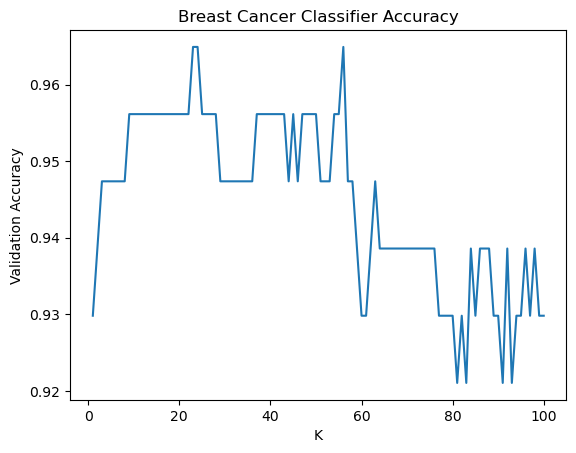

<Figure size 640x480 with 0 Axes>

In [47]:
# Best score and best k
print('Best k: ', best_k)
print('Best accuracy: ', best_accuracy)

sns.lineplot(x=k_list, y=accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()
plt.clf()